In [4]:
import pandas as pd
import numpy as np

np.random.seed(1212)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

print(X_test.shape)

(300, 2)


In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size=0.2,
                                                random_state=1212)

X_train = X_train.values.reshape(33600, 784)
X_cv = X_cv.values.reshape(8400, 784)




In [9]:
print((min(X_train[1]), max(X_train[1])))

(0, 255)


In [10]:
X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_cv /= 255; X_test /= 255

num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [11]:
print(y_train[0]) # 2
print(y_train[3]) # 7

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:

n_input = 784 
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [13]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [14]:
model = Model(Inp, output)
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 200)               20200     
                                                                 
 Output_Layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297910 (1.14 MB)
Trainable params: 297910 (1.14

In [15]:
from keras import optimizers

learning_rate = 0.1
training_epochs = 20
batch_size = 100

sgd = optimizers.SGD(learning_rate=learning_rate)


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Epoch 1/20
336/336 - 3s - loss: 1.8168 - accuracy: 0.4924 - val_loss: 0.9549 - val_accuracy: 0.7736 - 3s/epoch - 9ms/step
Epoch 2/20
336/336 - 2s - loss: 0.6088 - accuracy: 0.8401 - val_loss: 0.4413 - val_accuracy: 0.8788 - 2s/epoch - 5ms/step
Epoch 3/20
336/336 - 2s - loss: 0.3972 - accuracy: 0.8866 - val_loss: 0.3584 - val_accuracy: 0.8974 - 2s/epoch - 5ms/step
Epoch 4/20
336/336 - 2s - loss: 0.3360 - accuracy: 0.9016 - val_loss: 0.3151 - val_accuracy: 0.9089 - 2s/epoch - 5ms/step
Epoch 5/20
336/336 - 2s - loss: 0.2990 - accuracy: 0.9123 - val_loss: 0.2912 - val_accuracy: 0.9165 - 2s/epoch - 5ms/step
Epoch 6/20
336/336 - 2s - loss: 0.2721 - accuracy: 0.9204 - val_loss: 0.2682 - val_accuracy: 0.9227 - 2s/epoch - 5ms/step
Epoch 7/20
336/336 - 2s - loss: 0.2503 - accuracy: 0.9268 - val_loss: 0.2531 - val_accuracy: 0.9268 - 2s/epoch - 5ms/step
Epoch 8/20
336/336 - 2s - loss: 0.2324 - accuracy: 0.9317 - val_loss: 0.2353 - val_accuracy: 0.9320 - 2s/epoch - 5ms/step
Epoch 9/20
336/336 - 2s 

In [18]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

adam = keras.optimizers.Adam(learning_rate=learning_rate)
model2 = Model(Inp, output)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
336/336 - 3s - loss: 0.3362 - accuracy: 0.8988 - val_loss: 0.1492 - val_accuracy: 0.9531 - 3s/epoch - 9ms/step
Epoch 2/20
336/336 - 2s - loss: 0.1213 - accuracy: 0.9624 - val_loss: 0.1044 - val_accuracy: 0.9693 - 2s/epoch - 5ms/step
Epoch 3/20
336/336 - 2s - loss: 0.0789 - accuracy: 0.9756 - val_loss: 0.0943 - val_accuracy: 0.9723 - 2s/epoch - 5ms/step
Epoch 4/20
336/336 - 2s - loss: 0.0568 - accuracy: 0.9818 - val_loss: 0.1134 - val_accuracy: 0.9656 - 2s/epoch - 5ms/step
Epoch 5/20
336/336 - 2s - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.1012 - val_accuracy: 0.9723 - 2s/epoch - 5ms/step
Epoch 6/20
336/336 - 2s - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0946 - val_accuracy: 0.9749 - 2s/epoch - 5ms/step
Epoch 7/20
336/336 - 2s - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.0873 - val_accuracy: 0.9765 - 2s/epoch - 5ms/step
Epoch 8/20
336/336 - 2s - loss: 0.0206 - accuracy: 0.9928 - val_loss: 0.1041 - val_accuracy: 0.9756 - 2s/epoch - 5ms/step
Epoch 9/20
336/336 - 2s 

In [19]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.01
adam = keras.optimizers.Adam(learning_rate=learning_rate)
model2a = Model(Inp, output)

model2a.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history2a = model2a.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                        verbose = 2,
                        validation_data=(X_cv, y_cv))

Epoch 1/20
336/336 - 3s - loss: 0.3297 - accuracy: 0.9025 - val_loss: 0.1730 - val_accuracy: 0.9467 - 3s/epoch - 8ms/step
Epoch 2/20
336/336 - 2s - loss: 0.1232 - accuracy: 0.9616 - val_loss: 0.1130 - val_accuracy: 0.9636 - 2s/epoch - 5ms/step
Epoch 3/20
336/336 - 2s - loss: 0.0796 - accuracy: 0.9759 - val_loss: 0.1035 - val_accuracy: 0.9677 - 2s/epoch - 5ms/step
Epoch 4/20
336/336 - 2s - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0951 - val_accuracy: 0.9717 - 2s/epoch - 5ms/step
Epoch 5/20
336/336 - 2s - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0952 - val_accuracy: 0.9735 - 2s/epoch - 5ms/step
Epoch 6/20
336/336 - 2s - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0953 - val_accuracy: 0.9739 - 2s/epoch - 5ms/step
Epoch 7/20
336/336 - 2s - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.1146 - val_accuracy: 0.9704 - 2s/epoch - 5ms/step
Epoch 8/20
336/336 - 2s - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.1165 - val_accuracy: 0.9718 - 2s/epoch - 5ms/step
Epoch 9/20
336/336 - 2s 

In [20]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.5
adam = keras.optimizers.Adam(learning_rate=learning_rate)
model2b = Model(Inp, output)

model2b.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [21]:
history2b = model2b.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                            validation_data=(X_cv, y_cv))

Epoch 1/20
336/336 [==============================] - 3s 6ms/step - loss: 0.3248 - accuracy: 0.9046 - val_loss: 0.1473 - val_accuracy: 0.9552
Epoch 2/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1192 - accuracy: 0.9634 - val_loss: 0.1291 - val_accuracy: 0.9607
Epoch 3/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0796 - accuracy: 0.9749 - val_loss: 0.1179 - val_accuracy: 0.9660
Epoch 4/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0987 - val_accuracy: 0.9695
Epoch 5/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0872 - val_accuracy: 0.9746
Epoch 6/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.1237 - val_accuracy: 0.9685
Epoch 7/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.1084 - val_accuracy: 0.9711
Epoch 

In [22]:

n_input = 784
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 100
n_hidden_5 = 200
num_digits = 10

In [23]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [24]:
model3 = Model(Inp, output)
model3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_5 (Dense)      (None, 200)               20200     
                                                                 
 Output_Layer (Dense)        (None, 10)                2010

In [25]:
adam = keras.optimizers.Adam(learning_rate=0.01)

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
336/336 [==============================] - 3s 6ms/step - loss: 0.3545 - accuracy: 0.8923 - val_loss: 0.1527 - val_accuracy: 0.9546
Epoch 2/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1280 - accuracy: 0.9611 - val_loss: 0.1261 - val_accuracy: 0.9630
Epoch 3/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0884 - accuracy: 0.9725 - val_loss: 0.1068 - val_accuracy: 0.9683
Epoch 4/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0614 - accuracy: 0.9809 - val_loss: 0.0950 - val_accuracy: 0.9715
Epoch 5/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.1116 - val_accuracy: 0.9695
Epoch 6/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.1086 - val_accuracy: 0.9711
Epoch 7/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.1112 - val_accuracy: 0.9708
Epoch 

In [26]:
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model4.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0   

In [31]:
import h5py

with h5py.File('C:\\Users\\91888\\Downloads\\xyx\\Lib\\site-packages\\tensorflow\\python\\keras\\saving\\__pycache__\\hdf5_format.cpython-311.pyc', 'w') as file:
    dataset = file.create_dataset('data', shape=(10, 10), dtype='float32')
    dataset[...] = 42.0


In [34]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
train_data=pd.read_csv('train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
train_data.shape

(42000, 785)

In [58]:
test_data=pd.read_csv('train.csv')
test_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_data.shape

(42000, 785)

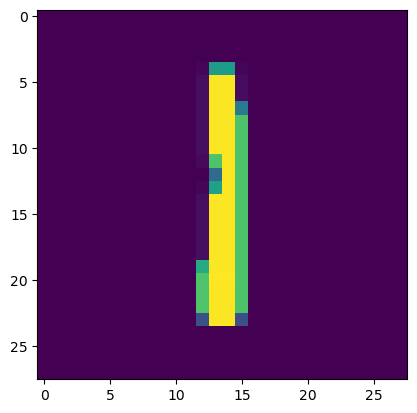

In [60]:
label=train_data.iloc[2,1:].values
label=label.reshape(28,28)
plt.imshow(label)

In [61]:
train_data.iloc[2,0]

1

In [62]:
X=train_data.iloc[:,1:]
Y=train_data.iloc[:,0]

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)
model=RandomForestClassifier(n_estimators=200,max_samples=0.5)
model.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=200)

In [65]:
pred=model.predict(x_test)
pred

array([8, 1, 9, ..., 5, 0, 4], dtype=int64)

In [66]:
pred.shape

(12601,)

In [67]:
model.score(x_train,y_train)

0.9991496309398279

In [68]:
model.score(x_test,y_test)

0.9586540750734068

In [69]:
print(confusion_matrix(pred,y_test))

[[1186    0    4    4    2    4    9    1    2    5]
 [   0 1374    4    2    0    2    3    8    9    4]
 [   2    6 1235   16    1    2    2   17    5    5]
 [   1    1    9 1261    0   18    0    1   12   22]
 [   2    1   10    2 1180    2    4   11    6   15]
 [   0    2    1   20    0 1030    7    0    8    5]
 [   5    4    6    2    9   12 1226    0    6    2]
 [   0    0   12   16    4    1    0 1288    2   12]
 [   4    0   12   20    4    7    5    3 1145    6]
 [   0    1    1   12   23    7    0   30   14 1155]]


In [70]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1217
           1       0.99      0.98      0.98      1406
           2       0.95      0.96      0.96      1291
           3       0.93      0.95      0.94      1325
           4       0.96      0.96      0.96      1233
           5       0.95      0.96      0.95      1073
           6       0.98      0.96      0.97      1272
           7       0.95      0.96      0.96      1335
           8       0.95      0.95      0.95      1206
           9       0.94      0.93      0.93      1243

    accuracy                           0.96     12601
   macro avg       0.96      0.96      0.96     12601
weighted avg       0.96      0.96      0.96     12601



In [79]:
if 'label' in test_data.columns:
    test_data = test_data.drop(columns=['label'])  

test_data_pred = model.predict(test_data)


In [80]:
test_data_pred=model.predict(test_data)
test_data_pred

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

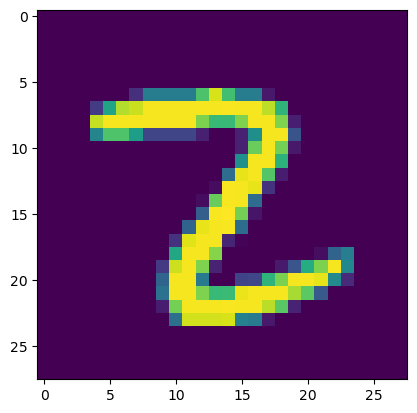

In [81]:
b=test_data.iloc[24,0:].values
b=b.reshape(28,28)
plt.imshow(b)

In [82]:
test_data_pred[24]

2